# UX Research at Scale: Analytics and Online Experiments
## User Behavior 

In [120]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

### Analysis of Usage Over Time
http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html

In [121]:
daily_visits_df =  pd.read_csv('Analytics_Dataset_visits_time.csv')

In [81]:
#Formatting 
#removes NaN
daily_visits_df = daily_visits_df.dropna()
#formats date 
daily_visits_df['Day Index'] = pd.to_datetime(daily_visits_df['Day Index'],format='%d/%m/%Y')
#inclu
daily_visits_df = daily_visits_df.set_index('Day Index')

## Trends
#### The number of sessions had a start at 150 in mid July and then  spiked to 400 in mid September. Then the number of sessions declined progresively getting an average of 50 daily sessions the first week of October. This suggests that there was an event that sparked interest in the site. 

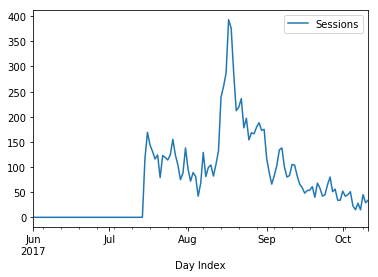

In [83]:
daily_visits_df.plot()
plt.show()

## Adquisition Source
This data comes from Google Analytics
More info here: https://support.google.com/analytics/answer/3297892?hl=en

In [116]:
adquistition_source_df =  pd.read_csv( 'Analytics_Dataset_adquisition_source.csv')
adquistition_source_df.head(5)

,Default Channel Grouping,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Example - Typical (Goal 1 Conversion Rate),Example - Typical (Goal 1 Completions),Example - Typical (Goal 1 Value)
0,Direct,7510,50.99%,3829,25.75%,6.39,551.00,15.11%,1135,0
1,Referral,1637,35.37%,579,33.48%,5.59,443.26,11.55%,189,0
2,Social,572,51.05%,292,24.65%,6.88,554.39,13.81%,79,0
3,Organic Search,169,44.97%,76,14.20%,8.57,810.51,18.93%,32,0


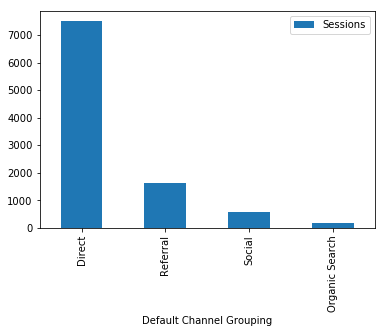

In [117]:
adquistition_source_df.plot.bar(x='Default Channel Grouping', y='Sessions')
#tranforming string into float
adquistition_source_df['Bounce Rate'] = adquistition_source_df['Bounce Rate'].str.strip('%').astype(float)
#adquistition_source_df[['Bounce Rate','Example - Typical (Goal 1 Conversion Rate)']] = adquistition_source_df[['Bounce Rate','Example - Typical (Goal 1 Conversion Rate)']].str.strip('%').astype(float)
plt.show()
#The vast majority of the sessions come from = Direct sources, where the source is unknown

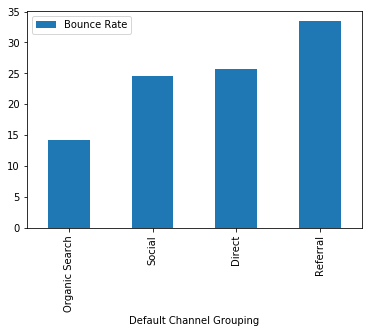

In [134]:
adquistition_source_df = adquistition_source_df.sort_values('Bounce Rate')
adquistition_source_df.plot.bar(x='Default Channel Grouping', y='Bounce Rate')
plt.show()

#Visits that come from the a Referal source tend to spend more time in the site.
#This suggests that the more content is created in in other sites refferring to the our site, the more quality traffic we are likely to generage

# Who is currently using the site?

In [122]:
os.listdir()

['.ipynb_checkpoints',
 'Analytics_Dataset.xlsx',
 'Analytics_Dataset_adquisition_source.csv',
 'Analytics_Dataset_age.csv',
 'Analytics_Dataset_visits_time.csv',
 'UserBehaviorAnalytics.ipynb']

In [148]:
ages =  pd.read_csv('Analytics_Dataset_age.csv')
ages = ages.dropna()

In [158]:
ages.head(4)

,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Example - Typical (Goal 1 Conversion Rate),Example - Typical (Goal 1 Completions),Example - Typical (Goal 1 Value)
Age,,,,,,,,,
65+,1587.0,0.38,606.0,0.23,6.96,613.57,0.27,434.0,0.0
55-64,928.0,0.40,374.0,0.25,6.33,523.55,0.22,203.0,0.0
35-44,479.0,0.45,215.0,0.34,5.27,455.67,0.19,91.0,0.0
45-54,471.0,0.42,198.0,0.30,5.85,474.59,0.20,92.0,0.0


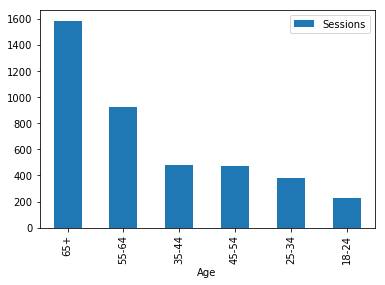

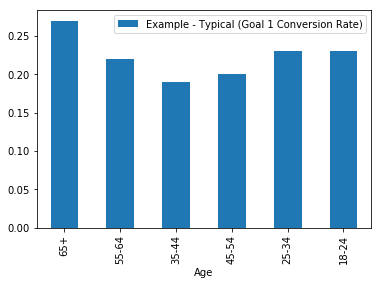

In [160]:
ages.plot.bar(y='Sessions')
ages.plot.bar(y='Example - Typical (Goal 1 Conversion Rate)')
plt.show()
#The biggest segment group is people aged +65
#The conversion Rate is also higher for group ages +65 However, the differenc with other groups is only 5%. It may be interesting to target  youger groups

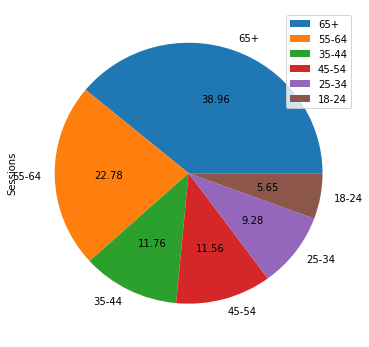

In [157]:
#ages = ages.set_index('Age')
ages.plot.pie(y='Sessions',figsize=(6, 6),autopct='%.2f')
plt.show()
#The vast majority of the users are 45 or more years old

### Gender Analysis

In [161]:
os.listdir()

['.ipynb_checkpoints',
 'Analytics_Dataset.xlsx',
 'Analytics_Dataset_adquisition_source.csv',
 'Analytics_Dataset_age.csv',
 'Analytics_Dataset_gender.csv',
 'Analytics_Dataset_visits_time.csv',
 'UserBehaviorAnalytics.ipynb']

In [163]:
gendf =  pd.read_csv('Analytics_Dataset_gender.csv')
gendf = gendf.dropna()
gendf = gendf.set_index('Gender')
gendf.head()
#The majority of the users are female 57%. However, the rest of the metrics are quite similar.  
#This suggests that the site is not popular between men but the content is still interesting for them once they are in

,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Example - Typical (Goal 1 Conversion Rate),Example - Typical (Goal 1 Completions),Example - Typical (Goal 1 Value)
Gender,,,,,,,,,
female,2406.0,0.41,989.0,26.14%,6.33,543.83,24.11%,580.0,0.0
male,1770.0,0.41,720.0,27.46%,6.41,542.80,22.77%,403.0,0.0


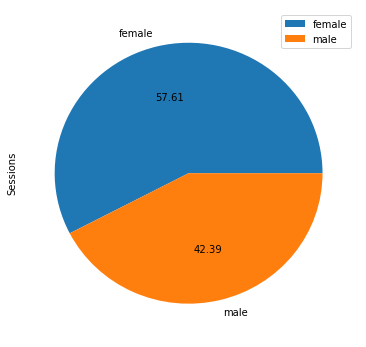

In [167]:
gendf.plot.pie(y= 'Sessions',figsize=(6, 6),autopct='%.2f')
plt.show()

## Analyzing Mobile Devices Usage 

In [193]:
#The bounce rate is incredibly high. People using smartphones, small screens are not staying in the site and not converting
devices =  pd.read_csv('Analytics_Dataset_mobile_devices.csv')
devices = devices.dropna()
devices = devices.set_index('Mobile Device Info')
devices.head(3)

,Sessions,% New Sessions,New Users,Bounce Rate,Pages / Session,Avg. Session Duration,Example - Typical (Goal 1 Conversion Rate),Example - Typical (Goal 1 Completions),Example - Typical (Goal 1 Value)
Mobile Device Info,,,,,,,,,
Apple iPad,1255.0,0.44,550.0,0.28,5.67,472.12,0.12,154.0,0.0
Apple iPhone,1065.0,0.58,618.0,0.41,4.40,278.92,0.07,78.0,0.0
Microsoft Windows RT Tablet Windows RT Tablet,57.0,0.65,37.0,0.18,7.81,463.46,0.18,10.0,0.0


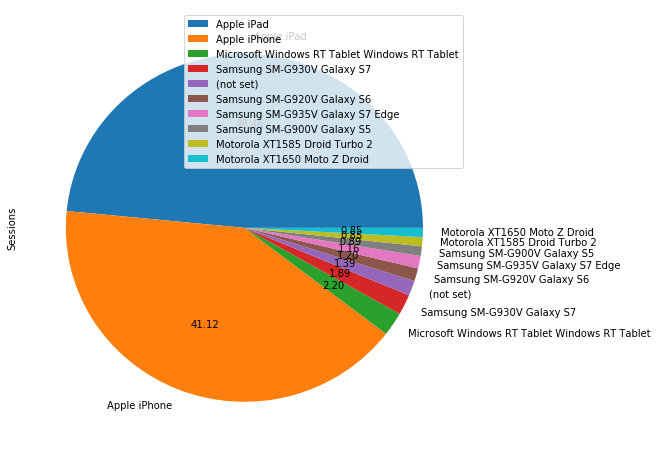

In [196]:
devices.plot.pie(y='Sessions',figsize=(8, 8),autopct='%.2f')
#The vast majority of the users use Apple products. Almost half of the visits come from Iphones
plt.show()

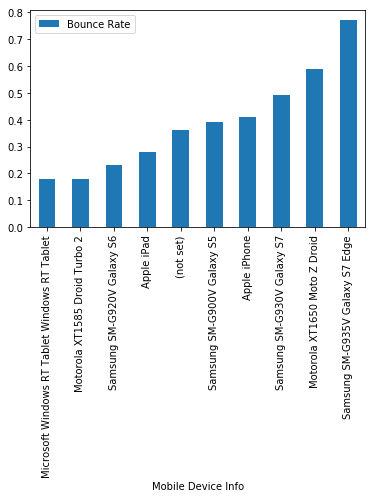

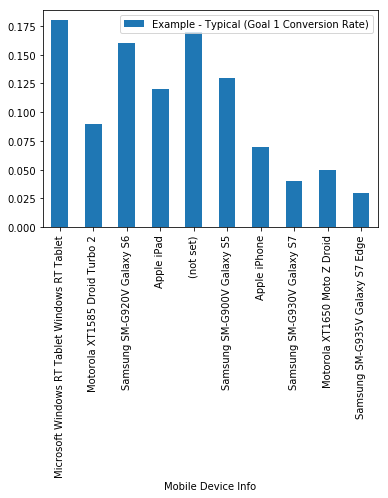

In [190]:
devices.sort_values('Bounce Rate').plot.bar(y='Bounce Rate')
devices.sort_values('Bounce Rate').plot.bar(y='Example - Typical (Goal 1 Conversion Rate)')
#The Bounce Rate is very high for small screens. This suggest than an adaptation to this screens would improve usabity of the site
#The conversion rate is corelated with the bounce rate. An optomization of the site for Iphone would massively improve the conversion rate and overall site conversions. 
plt.show()

## Analysing Pathways